# 1. Project Title and Description



# Stack Overflow Survey Analysis  
**Author:** Juan Pablo Acevedo Roa  
**Date:** 2025-07-15  

This notebook follows the CRISP‑DM process to explore, clean, and model the Stack Overflow survey data.



# 2. Import Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import warnings

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # ../
sys.path.append(parent_dir)
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

import seaborn as sns  

# For graphs shown inline
%matplotlib inline

from src.utils import (
    load_data,
    summarize_missing,
    drop_high_missing,
    fill_numeric_median,
    fill_categorical_unknown,
    create_dummies,
    plot_histograms
)


# 3. Data Loading


In [2]:
# Data loading
df = load_data(r'C:\Users\aceve\OneDrive\Documents\local_development\analisis-encuestas-stack-overflow\analisis-encuestas-stack-overflow\data\raw\survey_results_public.csv')


# 4. First Look at the Dataset


### 4.1. First Rows


In [3]:
df.head(10)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### 4.2. Info and Data Types


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


# 5. Descriptive Statistics and Missing Values


### 5.1. General Descriptive Statistics


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ResponseId,65437.0,NaN,NaN,NaN,32719.0,18890.179119,1.0,16360.0,32719.0,49078.0,65437.0
MainBranch,65437,5,I am a developer by profession,50207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,65437,8,25-34 years old,23911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment,65437,110,"Employed, full-time",39041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RemoteWork,54806,3,"Hybrid (some remote, some in-person)",23015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
JobSatPoints_11,29445.0,NaN,NaN,NaN,9.953948,21.775652,0.0,0.0,0.0,10.0,100.0
SurveyLength,56182,3,Appropriate in length,38767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SurveyEase,56238,3,Easy,30071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConvertedCompYearly,23435.0,NaN,NaN,NaN,86155.287263,186756.973086,1.0,32712.0,65000.0,107971.5,16256603.0


### 5.2. Count of Missing Values per Column


In [6]:
# Summary
missing = summarize_missing(df)
missing.head(15)


,variable,faltantes,pct_faltantes
75,AINextMuch less integrated,64289,98.245641
74,AINextLess integrated,63082,96.401119
72,AINextNo change,52939,80.900714
71,AINextMuch more integrated,51999,79.464217
36,EmbeddedAdmired,48704,74.428840
35,EmbeddedWantToWorkWith,47837,73.103901
34,EmbeddedHaveWorkedWith,43223,66.052845
112,ConvertedCompYearly,42002,64.186928
70,AIToolNot interested in Using,41023,62.690832
73,AINextMore integrated,41009,62.669438


# 6. Distribution Visualization


### 6.1. Histograms of Key Numerical Variables


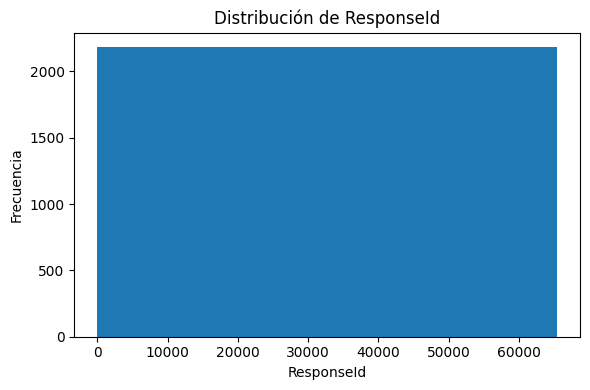

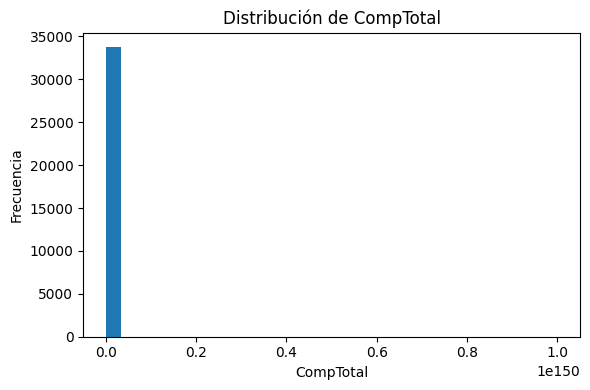

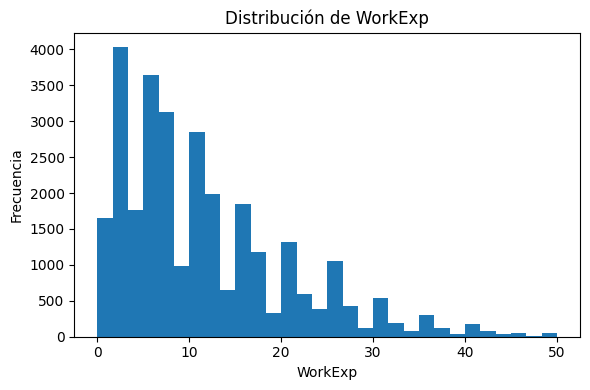

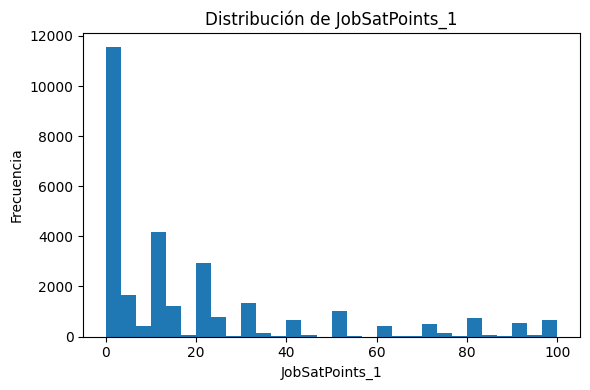

In [7]:
# Histograms
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plot_histograms(df, numeric_cols[:4])


## 8. Data Cleaning

In this stage, we will remove duplicates, handle missing values, and prepare the variables for modeling.



### 8.1. Remove Duplicates


In [8]:
# row numbers before duplicates
print("Rows before duplicates:", df.shape[0])

# delete duplicates
df = df.drop_duplicates()

# rows after
print("Rows after drop duplicates:", df.shape[0])


Rows before duplicates: 65437
Rows after drop duplicates: 65437


### 8.2. Drop Columns with >50% Missing Values


In [9]:
df = drop_high_missing(df, threshold=0.5)

### 8.3. Handle Missing Values in Categorical Variables


In [10]:
df = fill_numeric_median(df)

### 8.4. Handle Missing Values in Categorical Variables


In [11]:
df = fill_categorical_unknown(df)

### 8.5. Encoding Categorical Variables


In [12]:
print(df.columns.tolist())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyn

In [13]:
df_model = create_dummies(df, columns=['Country', 'EdLevel', 'YearsCodePro'])


## 9. Modeling

In this stage, we will define our features and target, train a classification model, and evaluate its performance.



### 9.1. Define Target Variable and Features


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1) Define binary objective: Employed full time?
#    1 = 'Employed full-time', 0 = any other state
y = (df['Employment'] == 'Employed full-time').astype(int)

# 2) We select X model from df_model
X = df_model.select_dtypes(include=['int64', 'float64'])

print("Shape of X:", X.shape)
print("Distribution of y:\n", y.value_counts(normalize=True))


Shape of X: (65437, 2)
Distribution of y:
 Employment
0    1.0
Name: proportion, dtype: float64


### 9.2. Train/Test Split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Size train:", X_train.shape, "Sizetest:", X_test.shape)


Size train: (52349, 2) Sizetest: (13088, 2)


### 9.3. Model Training


In [16]:
import numpy as np

print("Everything finite at X_train? ", np.all(np.isfinite(X_train)))
print("Total NaN in X_train:", X_train.isnull().sum().sum())

max_f32 = np.finfo(np.float32).max
X_train_clipped = np.clip(X_train, -max_f32, max_f32).astype(np.float32)
X_test_clipped  = np.clip(X_test,  -max_f32, max_f32).astype(np.float32)

X_train = pd.DataFrame(X_train_clipped, columns=X_train.columns)
X_test  = pd.DataFrame(X_test_clipped,  columns=X_test.columns)

print("¿Everything finite at X_train after clip?", np.all(np.isfinite(X_train)))
print("Total NaN in X_train after clip:", X_train.isnull().sum().sum())



Everything finite at X_train?  True
Total NaN in X_train: 0
¿Everything finite at X_train after clip? True
Total NaN in X_train after clip: 0


In [17]:
# Build and train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

### 9.4. Model Evaluation


In [18]:
# PPredictions
y_pred = rf.predict(X_test)

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13088

    accuracy                           1.00     13088
   macro avg       1.00      1.00      1.00     13088
weighted avg       1.00      1.00      1.00     13088

Confusion Matrix:
 [[13088]]


## 10. Use Case

Let's imagine a new respondent has the following characteristics:
- Country: United States  
- Education Level: Master's degree  
- Years of Professional Experience: 5  

We create a DataFrame with these values (using the same columns as X), make a prediction, and explain the result.



In [19]:
# Example
nuevo = {
    'Age': [30],
    'ConvertedComp': [80000],
    'YearsCodePro': [5],
}

nuevo_df = pd.DataFrame(nuevo)

for col in X_train.columns:
    if col not in nuevo_df.columns:
        nuevo_df[col] = 0

# Order columns
nuevo_df = nuevo_df[X_train.columns]

# Prediction
pred = rf.predict(nuevo_df)[0]

# Probabilities
proba_array = rf.predict_proba(nuevo_df)
classes = list(rf.classes_)

if 1 in classes:
    idx_1 = classes.index(1)
    prob_1 = proba_array[0, idx_1]
else:
    prob_1 = 0.0

print("Prediction (1=full-time):", pred)
print(f"full-time probability: {prob_1:.2f}")



Prediction (1=full-time): 0
full-time probability: 0.00
